<a href="https://colab.research.google.com/github/ssv273/Neural_Univesity/blob/main/hw_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Постройте график функции sin(x) - x * 0.5 для x от -5 до 5.

2) Отобразите первые 5 шагов Momentum для начальной точки x = -4.

3) Модифицируйте Momentum таким образом, чтобы при подсчёте новых параметров к скорости добавлялась не производная в текущей точке x, а производная в точке x_ahead, которая находится как сумма текущей точки x и произведения текущей скорости с коэффициентом замедления. Более ничего менять не стоит. Полученный оптимизатор называется Nesterov momentum и, в отличие от обычного, использует информацию о позиции, где его фактически ещё не было, чтобы планировать своё дальнейшее перемещение.

4) Отобразите первые 5 шагов NesterovMomentum для начальной точки x = -4.

5) Сравните результаты для Momentum и NesterovMomentum, напишите свои выводы.

In [49]:
import matplotlib.pyplot as plt


In [46]:
def loss_func(x):
    return np.sin(x) - x * 0.5

In [47]:
x_values = np.linspace(-5, 5, 1000) # задаём значения, при которых считается ошибка
y_values = loss_func(x_values) # ищем значение ошибки в этих точках

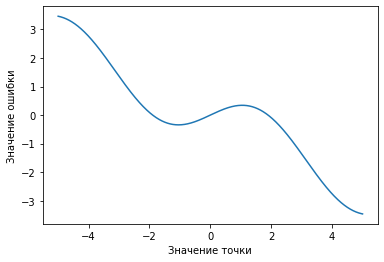

In [50]:
plt.plot(x_values, y_values) # изображаем кривую ошибки
plt.xlabel("Значение точки")
plt.ylabel("Значение ошибки")
plt.show()

In [54]:
def derivative(func, value, step = 1e-6): # функция для поиска производной в точке функции
    return (func(value + step) - func(value - step)) / (2 * step)

In [56]:
def draw_trajectory(x_values, y_values, estim_log, values_log):
    plt.plot(x_values, y_values) # изображаем кривую ошибки
    plt.plot(estim_log, values_log, marker='o') # изхображаем значения, через которые прошёл наш оптимизатор
    plt.legend(["Функция ошибки", "Путь оптимизатора"])
    plt.xlabel("Значение точки")
    plt.ylabel("Значение ошибки")
    plt.show()

In [114]:
class Momentum:
    def __init__(self, slowdown_rate = 0.9):
        self.v = 0 # скорость точки
        self.sd = slowdown_rate

    def apply_grad(self, x, dx, learning_rate):
        self.v = self.v * self.sd - learning_rate * dx # скорость сначала уменьшается, а затем растёт засчёт градиента в данной точке
        return x + self.v

In [115]:
momentum_optimizer = Momentum()

current_estimator = -4
estim_log = [current_estimator]
values_log = [loss_func(current_estimator)]

learning_steps = 5
learning_rate = 0.9

for i in range(learning_steps):
    derivative_val = derivative(loss_func, current_estimator)
    current_estimator = momentum_optimizer.apply_grad(current_estimator, 
                                                      derivative_val,
                                                      learning_rate) 
    estim_log.append(current_estimator)
    values_log.append(loss_func(current_estimator))

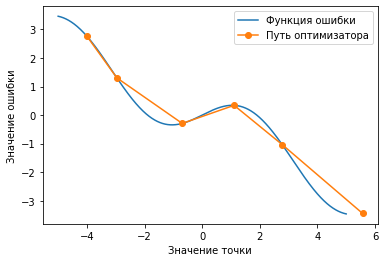

In [116]:
draw_trajectory(x_values, y_values, estim_log, values_log)

 Модифицируйте Momentum таким образом, чтобы при подсчёте новых параметров к скорости добавлялась не производная в текущей точке x, а производная в точке x_ahead, которая находится как сумма текущей точки x и произведения текущей скорости с коэффициентом замедления. Более ничего менять не стоит. Полученный оптимизатор называется Nesterov momentum и, в отличие от обычного, использует информацию о позиции, где его фактически ещё не было, чтобы планировать своё дальнейшее перемещение.

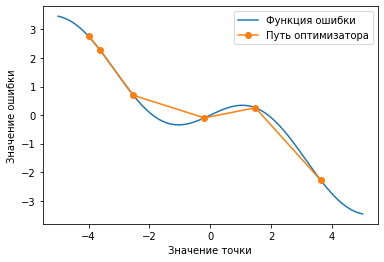

In [121]:
momentum_optimizer = Momentum()

current_estimator = -4
estim_log = [current_estimator]
values_log = [loss_func(current_estimator)]
slowdown_rate = 0.2

learning_steps = 5
learning_rate = 0.9

for i in range(learning_steps):
    derivative_val = derivative(loss_func, current_estimator + current_estimator*slowdown_rate)
    current_estimator = momentum_optimizer.apply_grad(current_estimator, 
                                                      derivative_val,
                                                      learning_rate) 
    estim_log.append(current_estimator)
    values_log.append(loss_func(current_estimator))
draw_trajectory(x_values, y_values, estim_log, values_log)